# MNIST like image generation with Conditional Generative Adverarial Networks 

In [1]:
import h5py
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import ops
from keras.saving import load_model as load_keras_model

In [2]:
from image_generators.conditional_gan import generate_samples
from image_generators.conditional_gan import generate_spurious_samples
from image_generators.conditional_gan.default_components import config

In [3]:
generator = load_keras_model('models/mnist_gan_generator.keras') 

## I. Example usage of trained image generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


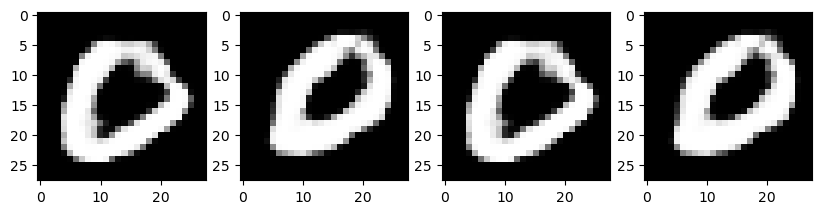

In [4]:
generated_images = generate_samples(generator, config, label=0, sample_count=4)
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[0], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[1], cmap='gray', vmin=0, vmax=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


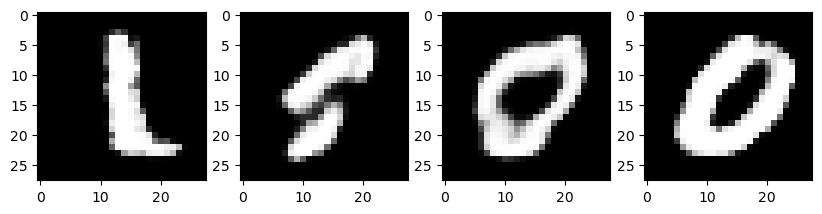

In [5]:
generated_images = generate_spurious_samples(generator, config, label_1=0, label_2=1, prop_vec=ops.linspace(0, 1, 4))
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[2], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[3], cmap='gray', vmin=0, vmax=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


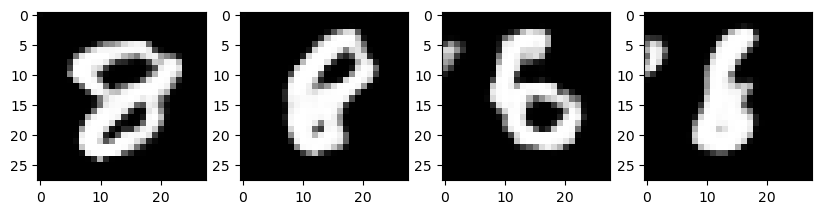

In [6]:
generated_images = generate_spurious_samples(generator, config, label_1=6, label_2=8, prop_vec=ops.linspace(0, 1, 4))
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[2], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[3], cmap='gray', vmin=0, vmax=1)

## II. Trainingset generation

We generate separate datasets for numbers 0,1,6 and 8. Each of size 100,000 samples.

In [7]:
N = 100000
with h5py.File('data/digits.h5', 'w') as hf:
    for i in range(10):
        hf.create_dataset(f'number_{i}', data=generate_samples(generator, config, i, N))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 96s 31ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 92s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 93s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 97s 31ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 100s 32ms/step


# III. Trainingset validation

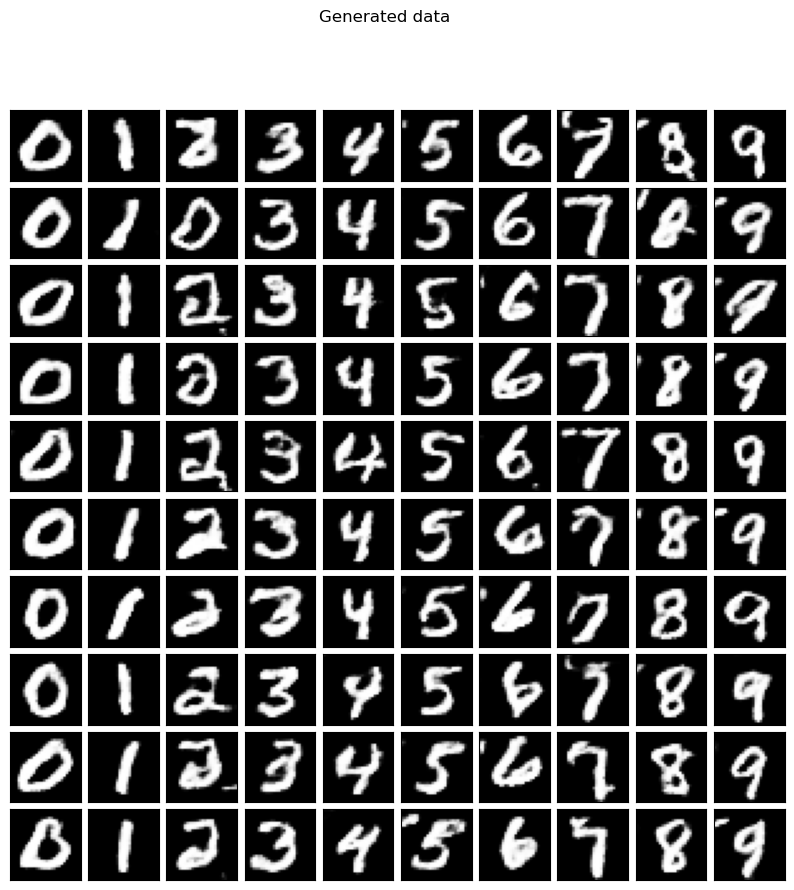

In [8]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('Generated data')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.setp(axs, xticks=[], yticks=[], xlabel='', ylabel='', aspect='equal')
with h5py.File('data/digits.h5', 'r') as hf:
    for i in range(10):
        for j in range(10):
            axs[j, i].imshow(hf[f'number_{i}'][j], cmap='gray', vmin=0, vmax=1)        